In [1]:
from image_patch import *

File already downloaded.
/data/hl32263/Code/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt


2024-04-23 11:24:39.514078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 11:24:39.653227: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 11:24:40.114915: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/hl32263/miniconda3/envs/vipergpt/lib/python3.10/site-packages/cv2/../../lib64:
20

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
import pickle
img_train_path = "/data/mn27889/pvqa/images/test/"
qas_train_path = "/data/mn27889/pvqa/qas/test/test_qa.pkl"

with open(qas_train_path, 'rb') as file:
    pvqa_qas = pickle.load(file)

In [3]:
qas_yes_no = [qas for qas in pvqa_qas if qas['answer'] == 'yes' or qas['answer'] == 'no']
ques_yes_no = [qas['question'] for qas in qas_yes_no]
ans_yes_no = [qas['answer'] for qas in qas_yes_no]
img_yes_no = [qas['image']  for qas in qas_yes_no]
img_yes_no_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_yes_no]

In [5]:
qas_general = [qas for qas in pvqa_qas if qas['answer'] != 'yes' and qas['answer'] != 'no']
ques_general = [qas['question'] for qas in qas_general]
ans_general = [qas['answer'] for qas in qas_general]
img_general = [qas['image']  for qas in qas_general]
img_general_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_general]

In [5]:
# for i, img in enumerate(img_general):
#     if img == "test_0013":
#         print(i)

### For a Pathology Image

What surrounds the neoplastic follicles?
a fibrous capsule


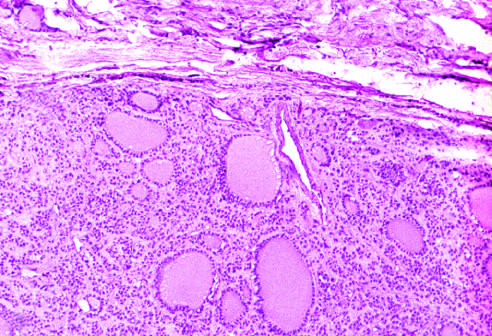

In [6]:
idx = 200
query = ques_general[idx]
query_ans = ans_general[idx]
query_img = Image.open(img_general_path[idx]).convert(mode="RGB")
print(query)
print(query_ans)
query_img

In [7]:
img_patch = ImagePatch(image=query_img)
a = img_patch.find_histo_patches()
print(a)

File already downloaded.
/data/mn27889/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt


/data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'histocartography.ml.models.hovernet.HoverNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'histocartography.ml.models.hovernet.Encoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'histocartography.ml.models.hov

File already downloaded.
/data/mn27889/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt


/data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


File already downloaded.
/data/mn27889/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt
File already downloaded.
/data/mn27889/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt
[ImagePatch(230, 336, 492, 157), ImagePatch(66, 336, 328, 157), ImagePatch(0, 336, 164, 157)]


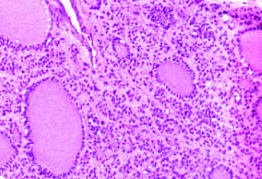

In [8]:
a[0].cropped_image

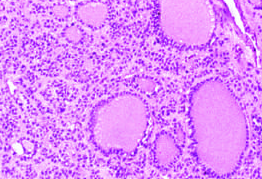

In [9]:
a[1].cropped_image

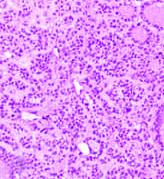

In [10]:
a[2].cropped_image

### For a Non-Pathology Image

What contains necrotic debris?
lumen


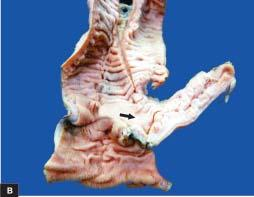

In [11]:
idx = 391
query = ques_general[idx]
query_ans = ans_general[idx]
query_img = Image.open(img_general_path[idx]).convert(mode="RGB")
print(query)
print(query_ans)
query_img

In [12]:
img_patch = ImagePatch(image=query_img)
a = img_patch.find_histo_patches()
print(a)

File already downloaded.
/data/mn27889/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt


Patch-level nuclei detection:   0%|          | 0/1 [00:00<?, ?it/s]/data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Patch-level nuclei detection: 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]


File already downloaded.
/data/mn27889/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt
[ImagePatch(0, 0, 254, 197)]


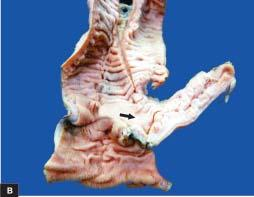

In [13]:
a[0].cropped_image